In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp

# Step 1: Define the stock symbols
stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ITC.NS']

# Step 2: Download historical data
start_date = '2022-01-01'
end_date = '2022-12-31'
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Step 3: Calculate expected returns and covariance
returns = data.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Step 4: Define the optimization problem
n = len(stocks)
weights = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mean_returns.values @ weights
risk = cp.quad_form(weights, cov_matrix.values)
objective = cp.Maximize(ret - gamma*risk)
constraints = [cp.sum(weights) == 1, weights >= 0]

# Step 5: Solve the optimization problem
prob = cp.Problem(objective, constraints)
gamma.value = 1  # You can adjust this value to change the risk preference
prob.solve()

# Step 6: Get the optimal weights
optimal_weights = weights.value

# Display the results
print("Optimal Portfolio Weights:")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight:.2%}")

# Note: The risk preference parameter (gamma) controls the trade-off between risk and return.


[*********************100%%**********************]  5 of 5 completed
Optimal Portfolio Weights:
TCS.NS: 0.00%
RELIANCE.NS: -0.00%
HDFCBANK.NS: 100.00%
INFY.NS: -0.00%
ITC.NS: -0.00%


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


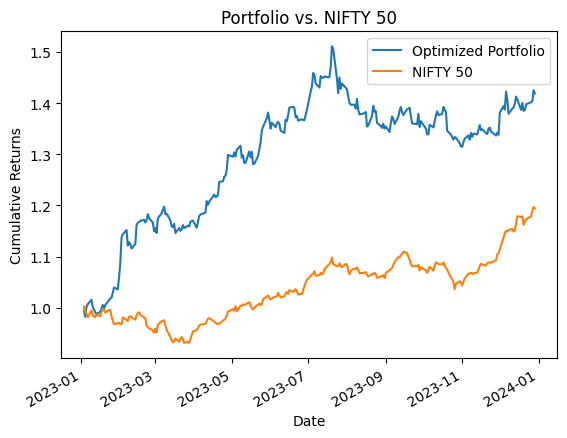

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp


# Step 7: Download 2023 data for performance evaluation
data_2023 = yf.download(stocks, start='2023-01-01', end='2023-12-30')['Adj Close']

# Step 8: Calculate portfolio daily returns in 2023
returns_2023 = data_2023.pct_change().dropna()
portfolio_returns_2023 = (returns_2023 * optimal_weights).sum(axis=1)

# Step 9: Calculate cumulative returns for the portfolio
cumulative_returns_2023 = (1 + portfolio_returns_2023).cumprod()

# Step 10: Plot the cumulative returns
import matplotlib.pyplot as plt

#cumulative_returns_2023.plot()
# plt.title('Cumulative Returns of the Optimized Portfolio in 2023')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.show()

# Optional: Compare with a benchmark (e.g., NIFTY 50 Index)
nifty_50 = yf.download('^NSEI', start='2023-01-01', end='2023-12-31')['Adj Close']
nifty_50_returns = nifty_50.pct_change().dropna()
cumulative_nifty_50 = (1 + nifty_50_returns).cumprod()

cumulative_returns_2023.plot(label='Optimized Portfolio')
cumulative_nifty_50.plot(label='NIFTY 50')
plt.legend()
plt.title('Portfolio vs. NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


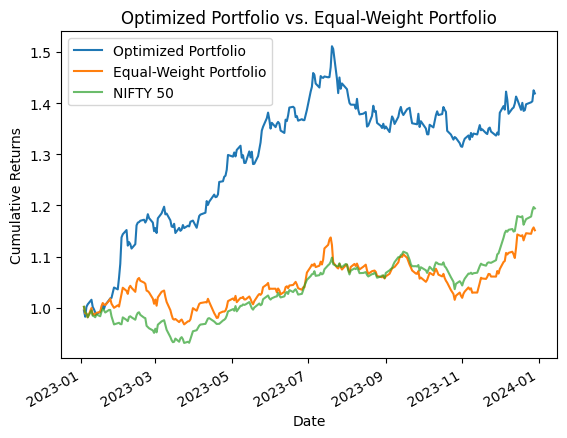

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt



# Step 11: Calculate equal-weight portfolio returns for 2023
equal_weights = np.array([1/n] * n)  # Equal weights for each stock
equal_weight_returns_2023 = (returns_2023 * equal_weights).sum(axis=1)
cumulative_equal_weight_returns_2023 = (1 + equal_weight_returns_2023).cumprod()

# Step 12: Plot the cumulative returns for both portfolios
cumulative_returns_2023.plot(label='Optimized Portfolio')
cumulative_equal_weight_returns_2023.plot(label='Equal-Weight Portfolio')
# Optional: Include NIFTY 50 for additional comparison
cumulative_nifty_50.plot(label='NIFTY 50', alpha=0.7)  # Adding NIFTY 50 to the same plot
plt.legend()
plt.title('Optimized Portfolio vs. Equal-Weight Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


